# QOSF Screening Task # 2
<p><a href="#Complete-Code">CLICK HERE</a> to skip to the complete code and visualization</p>

In [17]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_state_qsphere
import random
backend = Aer.get_backend('qasm_simulator')

<p>We are supposed to introduce the bit-flip and phase-flip noise to both qubits before the CNOT is applied, i.e after the barrier in the circuit below</p>

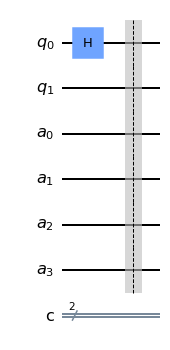

In [18]:
qr = QuantumRegister(2,'q')
a = QuantumRegister(4,'a')
cr= ClassicalRegister(2,'c')
circuit = QuantumCircuit(qr,a,cr)
circuit.h(0)
circuit.barrier()
#NOISE
circuit.draw("mpl")

# Adding Noise
<p>The possible noise combinations will be XZ|+0>, XX|+0>, XI|+0>, ZZ|+0>, ZX|+0>, ZI|+0>, IZ|+0>, IX|+0>. Since the noise is after the Hadaard gate and as bitflip is just phase flip in hadamard basis,this helps us remove some possibilities since bit-flip will have no overall affect on q0 and similarly, phase-flip will only affect q0.

So we will only cater for the following cases: ZX|+0>, ZI|+0> and IX|+0></p>

The noise is: ZX


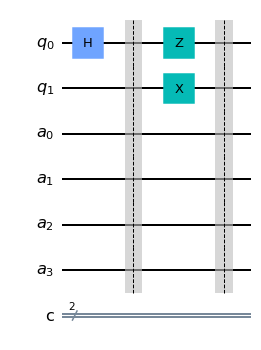

In [19]:
r = random.randint(1,30) # for the cases ZX, ZI and IX
if r<=20:
    print('The noise is: ZX')
    circuit.z(0)
    circuit.x(1)
elif r<=25 and r>20:
    print('The noise is: ZI')
    circuit.z(0)
elif r<=30 and r>25:
    print('The noise is: IX')
    circuit.x(1)
circuit.barrier()
circuit.draw("mpl")

<p>Since the noises are applied randomly to either of the two qubits we need to implement error correction and hence that is we need 2+2 ancialliary qubits. (2-Bflip , 2-Pflip)</p>

# Negating phase flip error
<p>This part converts |-> state to |+> and does nothing to |+></p>

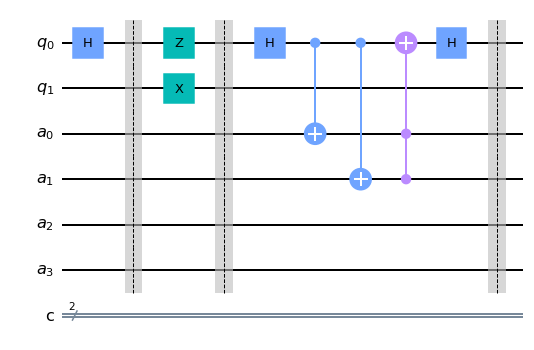

In [20]:
#To remove the phase-flip correction we just comment out this entore cell of code
circuit.h(0)
circuit.cx(qr[0],a[0])
circuit.cx(qr[0],a[1])
circuit.ccx(a[1],a[0],qr[0])
circuit.h(0)
circuit.barrier()
circuit.draw("mpl")

# Negating bit flip error
<p>this part converts 1 state to 0 and does nothing to 0</p>

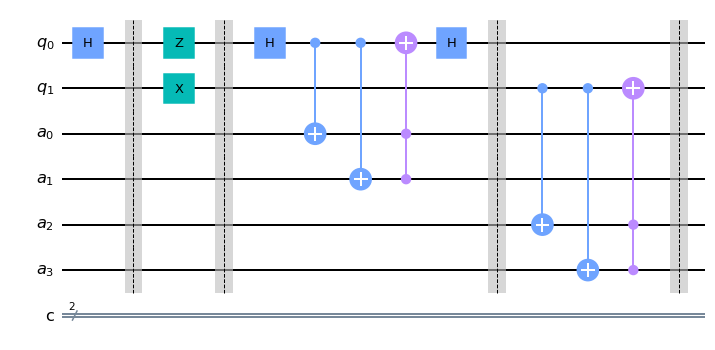

In [21]:
#To remove the bit-flip correction we just comment out this entore cell of code
circuit.cx(qr[1],a[2])
circuit.cx(qr[1],a[3])
circuit.ccx(a[3],a[2],qr[1])
circuit.barrier()
circuit.draw("mpl")

<p>Applying the final CNOT gate</p>

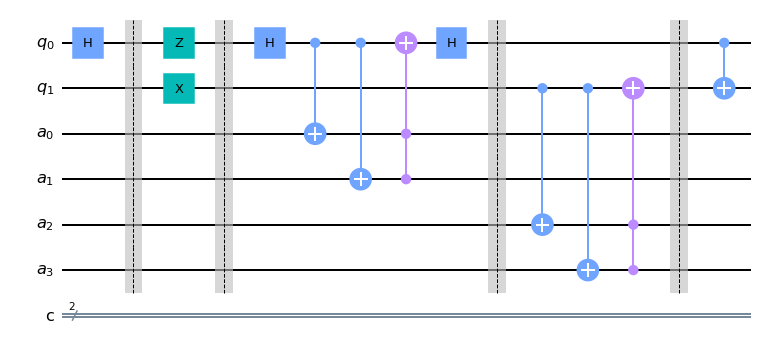

In [22]:
circuit.cx(0,1)
circuit.draw("mpl")

# Visualization (q-sphere)
<p>It is easy to verify the final state of the system via visualizing the result traced over anciliary qubits on the q-sphere</p>

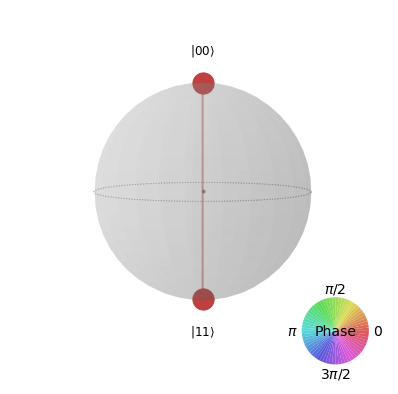

In [23]:
state = Statevector.from_instruction(circuit)
rstate = partial_trace(state, [2,3,4,5])
plot_state_qsphere(rstate)

# Histogram for multiple counts
<p>We can also see the output as a histogram</p>

In [24]:
circuit.measure(qr,cr)
job = execute(circuit, backend, shots=1024)
job_monitor(job)
counts = execute(circuit,backend).result().get_counts()

Job Status: job has successfully run


In [25]:
print(counts)

{'00': 497, '11': 527}


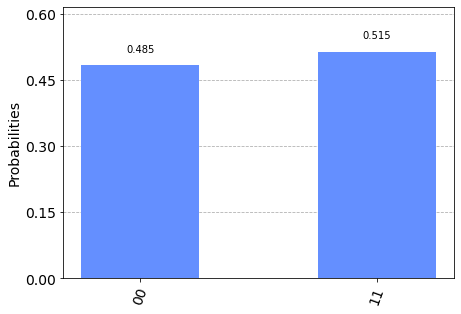

In [26]:
plot_histogram(counts)

# Complete Code

In [27]:
# Lets import the necessary things to get started
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram # visualization
from qiskit.quantum_info import Statevector, partial_trace # needed for partial trace and q-sphere
from qiskit.visualization import plot_state_qsphere # visualization
import random
backend = Aer.get_backend('qasm_simulator')
#--------------------------------------------------------

# Defining the circuit and ancilla
qr = QuantumRegister(2,'q') # quantum registers
a = QuantumRegister(4,'a') # ancilllary qbits
cr= ClassicalRegister(2,'c') # classical bits
circuit = QuantumCircuit(qr,a,cr)
circuit.h(0)
#--------------------------------------------------------

#introducing noise
r = random.randint(1,30) # for the cases ZX, ZI and IX
if r<=10:
    print('The noise is: ZX')
    circuit.z(0)
    circuit.x(1)
elif r<=20 and r>10:
    print('The noise is: ZI')
    circuit.z(0)
elif r<=30 and r>20:
    print('The noise is: IX')
    circuit.x(1)
#--------------------------------------------------------
#!!!--- To remove the correction we just comment out this entore block of code--- !!!
# # Negating phase flip error
circuit.h(0)
circuit.cx(qr[0],a[0])
circuit.cx(qr[0],a[1])
circuit.ccx(a[1],a[0],qr[0])
circuit.h(0)
# # Negating bit flip error
circuit.cx(qr[1],a[2])
circuit.cx(qr[1],a[3])
circuit.ccx(a[3],a[2],qr[1])
#--------------------------------------------------------

#Applying CNOT
circuit.cx(0,1)
#--------------------------------------------------------

#Visualizing the result

#as q-sphere
state = Statevector.from_instruction(circuit)
rstate = partial_trace(state, [2,3,4,5])

# get counts
circuit.measure(qr,cr)
job = execute(circuit, backend, shots=1000)
job_monitor(job)
counts = execute(circuit,backend).result().get_counts()

The noise is: IX
Job Status: job has successfully run


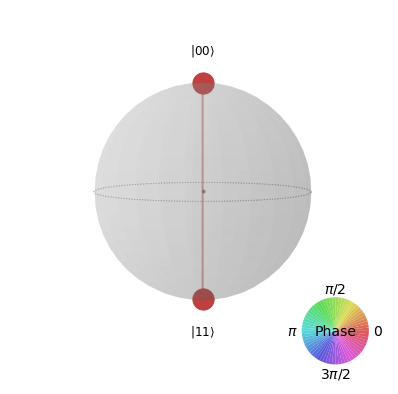

In [29]:
plot_state_qsphere(rstate) # Plot q-sphere

In [30]:
print(counts) # Get counts

{'00': 507, '11': 517}


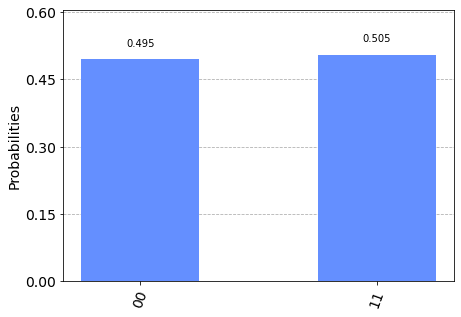

In [31]:
plot_histogram(counts) # Plot histogram